### Ecommerce Text Classification

***

This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns - the first column is the class name and the second one is the datapoint of that class. The data point is the product and description from the e-commerce website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'ecommerceDataset.csv'

In [2]:
df = pd.read_csv('ecommerceDataset.csv', header = None)

In [3]:
df = df.sample(frac = 1)

In [4]:
df.reset_index(drop = True, inplace = True)

In [5]:
df = df[0:1000]

In [6]:
df.head()

,0,1
0,Household,MBTC Cadbury Cafeteria/Bar Stool in Black Set ...
1,Electronics,Pes Camouflage Protective Frame Mount Housing ...
2,Household,WICKER HUB Wicker Outdoor Patio Sofa Set (Whit...
3,Books,FOK Set Of 5Pc Good Quality Plastic Printed Sh...
4,Household,Generic Innovative Rinse Bowl And Strainer In ...


### Check info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       999 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


### Check for missing values

In [8]:
df.isna().sum()

0    0
1    1
dtype: int64

### Drop missing rows

In [9]:
df.dropna(inplace = True)

### Print some of the text along with its Label

In [10]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Household -- MBTC Cadbury Cafeteria/Bar Stool in Black Set of 2 Color:Black   Add a stylish look to your kitchen or in-house bar with this MBTC Bar stool This stylish and sleek bar stool is made of fine quality metal . The fine metal provides a firm frame while the Black Seating with a natural finish gives it a glossy look. The light in weight design lets you move it around with ease. This bar stool comes with height adjustment facility at the base that allows you to lift it according to your preference

Electronics -- Pes Camouflage Protective Frame Mount Housing Camera Border with Quick Release Buckle and Screw for GoPro Hero 6 Hero 5 Accessory - Green ?Easy to carry, best guard who gives most effective and durable protection to your camera ?Smallest, lightest way to mount your for GoPro Hero 6/Heor 5 black ?Special and portable, receiving good acoustic radiation effect ?With side opening allow cables to be plugged into your camera for live-feed video, charging, cooling and enhanced 

### Create a function to preprocess the text

In [11]:
def preprocess(sentence):
    sentence = sentence.lower()
    
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    
    lemma = WordNetLemmatizer()
    text = [lemma.lemmatize(i) for i in text]
    
    return ' '.join(text)

In [12]:
df[1] = df[1].apply(preprocess)

### Print some of the texts after the applying the function

In [13]:
for i in range(5):
    print(df[0][i],'--',df[1][i])
    print()

Household -- mbtc cadbury cafeteria bar stool in black set of 2 color black add a stylish look to your kitchen or in house bar with this mbtc bar stool this stylish and sleek bar stool is made of fine quality metal the fine metal provides a firm frame while the black seating with a natural finish give it a glossy look the light in weight design let you move it around with ease this bar stool come with height adjustment facility at the base that allows you to lift it according to your preference

Electronics -- pe camouflage protective frame mount housing camera border with quick release buckle and screw for gopro hero 6 hero 5 accessory green easy to carry best guard who give most effective and durable protection to your camera smallest lightest way to mount your for gopro hero 6 heor 5 black special and portable receiving good acoustic radiation effect with side opening allow cable to be plugged into your camera for live feed video charging cooling and enhanced audio at low speed with

### Check for imbalance in the dataset

<Axes: ylabel='0'>

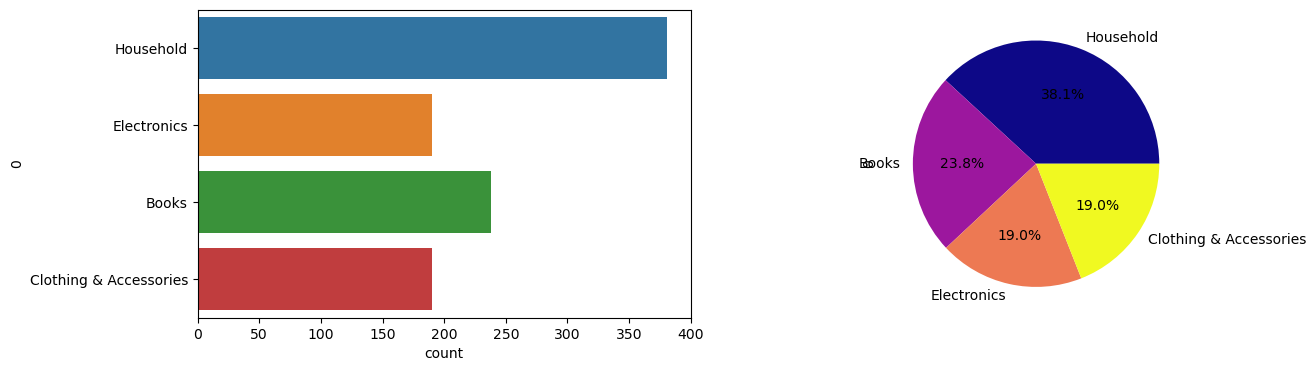

In [14]:
plt.figure(figsize= (14,4))
plt.subplot(1,2,1)
sns.countplot(y = df[0])
plt.subplot(1,2,2)
df[0].value_counts().plot.pie(autopct = '%1.1f%%', cmap = 'plasma')

### Split the dataset into Input & Target Variables

In [15]:
X = df[1]

In [16]:
y = df[0]

### Label Encode our Target Variables

In [17]:
y = y.map({'Household':0,'Books':1, 'Clothing & Accessories':2, 'Electronics':3})

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [18]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1

def text_encoding(txt):
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    padded_sequence = pad_sequences(encoded_docs, maxlen = 128)
    
    return padded_sequence

X = text_encoding(X)

### Split the dataset into Training & Testing set

In [19]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Create keras Sequential model with Bidirectional LSTM layers

In [20]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(4, activation = 'sigmoid'))

### Compile the model

In [21]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [22]:
model.fit(X_train, y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
24/24 [==============================] - 41s 1s/step - loss: 1.3169 - accuracy: 0.3992 - val_loss: 1.1964 - val_accuracy: 0.4000
Epoch 2/10
24/24 [==============================] - 23s 957ms/step - loss: 0.9770 - accuracy: 0.5942 - val_loss: 0.8220 - val_accuracy: 0.5500
Epoch 3/10
24/24 [==============================] - 23s 960ms/step - loss: 0.4984 - accuracy: 0.8142 - val_loss: 0.6703 - val_accuracy: 0.7500
Epoch 4/10
24/24 [==============================] - 23s 962ms/step - loss: 0.1976 - accuracy: 0.9433 - val_loss: 0.7212 - val_accuracy: 0.7750
Epoch 5/10
24/24 [==============================] - 24s 1s/step - loss: 0.0989 - accuracy: 0.9697 - val_loss: 0.6219 - val_accuracy: 0.8000
Epoch 6/10
24/24 [==============================] - 25s 1s/step - loss: 0.0350 - accuracy: 0.9947 - val_loss: 1.1120 - val_accuracy: 0.7500
Epoch 7/10
24/24 [==============================] - 24s 999ms/step - loss: 0.0411 - accuracy: 0.9921 - val_loss: 1.0523 - val_accuracy: 0.6750
Epoch 8/

### Make predictions with X_test

In [23]:
y_pred = model.predict(X_test)


7/7 [==============================] - 5s 223ms/step


### Fetch the index of the higher probable prediction

In [61]:
y_pred = [np.argmax(i) for i in y_pred]

### Evaluate the model

### Accuracy score

In [62]:
accuracy_score(y_test,y_pred)

0.87

### Confusion matrix

<AxesSubplot:>

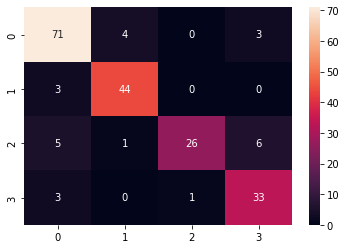

In [63]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Classification Report

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        78
           1       0.90      0.94      0.92        47
           2       0.96      0.68      0.80        38
           3       0.79      0.89      0.84        37

    accuracy                           0.87       200
   macro avg       0.88      0.86      0.86       200
weighted avg       0.88      0.87      0.87       200



***